# Power Laws in Pytorch

We compute the Empirical Spectral Density of the Fully Connected (FC) layers for all Pytorch pretrained models


http://pytorch.org/docs/master/torchvision/models.html



In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing notebook from RMT_Util.ipynb


/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3


In [6]:
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 16})

In [11]:
def analyze_model(model, plot=True):
    all_alphas = []
    pretrained_model = model(pretrained=True)
    
    model_name = model.__name__
    model_name = model_name.replace("_",' ')
    
    for im, m in enumerate(pretrained_model.modules()):
        if isinstance(m, nn.Linear):
                
            W = np.array(m.weight.data.clone().cpu())
            M, N = np.min(W.shape), np.max(W.shape)
            Q=N/M 
            
            sv, _ = RMT_Util.singular_spectrum(W)
            evals =(1/N)*sv*sv
            
            # RMT_Util.fit_power_law
            fit = powerlaw.Fit(evals, xmax=np.max(evals), verbose=False)  
            alpha = fit.alpha
            D = fit.D
            
            all_alphas.append(alpha)
            
            dist = RMT_Util.best_dist(fit)

            if plot:
                RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals, weightfile=None, layer=None, 
                                Q=Q, num_spikes=0, sigma=None, color='blue')
                plt.show()
            
            line = "{} & {}& {:.3g} & $({}\\times {})$ & {:.3g} & {:.3g} & {} \\\\ ".format(model_name,im, Q, np.min(W.shape),np.max(W.shape),alpha,D,dist)
            print(line)
            model_name = " "
    print("\\hline")
    return all_alphas


In [12]:
for model in [models.alexnet]:
    analyze_model(model, plot=False)

/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alexnet & 17& 2.25 & $(4096\times 9216)$ & 2.29 & 0.0527 & PL \\ 


Assuming nested distributions


  & 20& 1 & $(4096\times 4096)$ & 2.25 & 0.0372 & PL \\ 


Assuming nested distributions


  & 22& 4.1 & $(1000\times 4096)$ & 3.02 & 0.0186 & PL \\ 
\hline


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


### Generate data for Table

In [13]:
all_alphas = []
for model in [models.alexnet, 
              models.densenet121, models.densenet161, models.densenet169, models.densenet201, 
              models.inception_v3,
              models.resnet101, models.resnet152, models.resnet18, models.resnet34, models.resnet50, 
              models.squeezenet1_0, models.squeezenet1_1,
              models.vgg11, models.vgg11_bn,
              models.vgg16, models.vgg16_bn,
              models.vgg19, models.vgg19_bn ]:
    #print(model)
    alphas = analyze_model(model, plot=False)
    all_alphas.extend(alphas)

/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alexnet & 17& 2.25 & $(4096\times 9216)$ & 2.29 & 0.0527 & PL \\ 


Assuming nested distributions


  & 20& 1 & $(4096\times 4096)$ & 2.25 & 0.0372 & PL \\ 


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


  & 22& 4.1 & $(1000\times 4096)$ & 3.02 & 0.0186 & PL \\ 
\hline


Assuming nested distributions


densenet121 & 432& 1.02 & $(1000\times 1024)$ & 3.32 & 0.0383 & PL \\ 
\hline


Assuming nested distributions


densenet161 & 572& 2.21 & $(1000\times 2208)$ & 3.45 & 0.0322 & PL \\ 
\hline


Assuming nested distributions


densenet169 & 600& 1.66 & $(1000\times 1664)$ & 3.38 & 0.0396 & PL \\ 
\hline


Assuming nested distributions


densenet201 & 712& 1.92 & $(1000\times 1920)$ & 3.41 & 0.0332 & PL \\ 
\hline


Assuming nested distributions


inception v3 & 226& 1.3 & $(768\times 1000)$ & 5.26 & 0.0421 & PL \\ 


Assuming nested distributions


  & 302& 2.05 & $(1000\times 2048)$ & 4.48 & 0.0275 & PL \\ 
\hline


Assuming nested distributions


resnet101 & 286& 2.05 & $(1000\times 2048)$ & 3.57 & 0.0278 & PL \\ 
\hline


Assuming nested distributions


resnet152 & 422& 2.05 & $(1000\times 2048)$ & 3.52 & 0.0298 & PL \\ 
\hline


Assuming nested distributions


resnet18 & 67& 1.95 & $(512\times 1000)$ & 3.34 & 0.0342 & PL \\ 
\hline


Assuming nested distributions


resnet34 & 115& 1.95 & $(512\times 1000)$ & 3.39 & 0.0257 & PL \\ 
\hline


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.


resnet50 & 150& 2.05 & $(1000\times 2048)$ & 3.54 & 0.027 & PL \\ 
\hline
\hline
\hline


Assuming nested distributions


vgg11 & 24& 6.12 & $(4096\times 25088)$ & 2.32 & 0.0327 & PL \\ 


Assuming nested distributions


  & 27& 1 & $(4096\times 4096)$ & 2.17 & 0.0309 & TPL \\ 


Assuming nested distributions


  & 30& 4.1 & $(1000\times 4096)$ & 2.83 & 0.0398 & PL \\ 
\hline


Assuming nested distributions


vgg11 bn & 32& 6.12 & $(4096\times 25088)$ & 2.07 & 0.0311 & TPL \\ 


Assuming nested distributions


  & 35& 1 & $(4096\times 4096)$ & 1.95 & 0.0336 & TPL \\ 


Assuming nested distributions


  & 38& 4.1 & $(1000\times 4096)$ & 2.99 & 0.0339 & PL \\ 
\hline


Assuming nested distributions


vgg16 & 34& 6.12 & $(4096\times 25088)$ & 2.3 & 0.0277 & PL \\ 


Assuming nested distributions


  & 37& 1 & $(4096\times 4096)$ & 2.18 & 0.0321 & TPL \\ 


Assuming nested distributions


  & 40& 4.1 & $(1000\times 4096)$ & 2.09 & 0.0403 & TPL \\ 
\hline


Assuming nested distributions


vgg16 bn & 47& 6.12 & $(4096\times 25088)$ & 2.05 & 0.0285 & TPL \\ 


Assuming nested distributions


  & 50& 1 & $(4096\times 4096)$ & 1.97 & 0.0363 & TPL \\ 


Assuming nested distributions


  & 53& 4.1 & $(1000\times 4096)$ & 3.03 & 0.0358 & PL \\ 
\hline


Assuming nested distributions


vgg19 & 40& 6.12 & $(4096\times 25088)$ & 2.27 & 0.0247 & PL \\ 


Assuming nested distributions


  & 43& 1 & $(4096\times 4096)$ & 2.19 & 0.0313 & PL \\ 


Assuming nested distributions


  & 46& 4.1 & $(1000\times 4096)$ & 2.07 & 0.0368 & TPL \\ 
\hline


Assuming nested distributions


vgg19 bn & 56& 6.12 & $(4096\times 25088)$ & 2.04 & 0.0295 & TPL \\ 


Assuming nested distributions


  & 59& 1 & $(4096\times 4096)$ & 1.98 & 0.0373 & TPL \\ 
  & 62& 4.1 & $(1000\times 4096)$ & 3.03 & 0.035 & PL \\ 
\hline


Assuming nested distributions


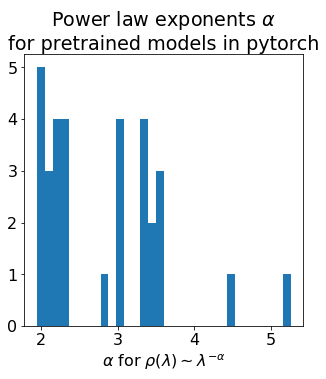

In [36]:
plt.hist(all_alphas,bins=32);
plt.title(r"Power law exponents $\alpha$ "+"\nfor pretrained models in pytorch")
plt.xlabel(r"$\alpha$ for $\rho(\lambda)\sim\lambda^{-\alpha}$")
plt.savefig("img/power-law-exponents")